GROWTH MODEL FOR TOBACCO USERS
Odalys Benitez and Austin Veseliza



In [34]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [35]:
from pandas import read_csv

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [42]:
filename = 'data/Adult_Tobacco_Consumption_In_The_U.S.__2000-Present.csv'
data = read_csv(filename, header=0)
relevant_rows= data[0:16]
relevant_data = relevant_rows[['Year', 'Total Per Capita']]
#data_timeseries = TimeSeries()
relevant_data.set_index('Year', inplace=True)
year = relevant_data.index
totalpc = relevant_data['Total Per Capita']



Year
2000    2148
2001    2075
2002    2006
2003    1916
2004    1888
2005    1807
2006    1787
2007    1690
2008    1615
2009    1472
2010    1400
2011    1374
2012    1342
2013    1277
2014    1216
2015    1217
Name: Total Per Capita, dtype: int64

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

Saving figure to file figs/chap03-fig01.pdf


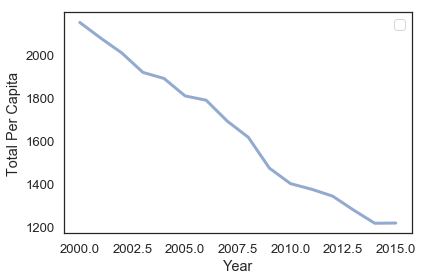

In [43]:
plot(year, totalpc)
decorate(xlabel='Year',
         ylabel='Total Per Capita')#add units
savefig('figs/chap03-fig01.pdf')  

In [54]:
t_0 = get_first_label(relevant_data)
t_end = get_last_label(relevant_data)
elapsed_time = t_end - t_0
p_0 = get_first_value(relevant_data)
p_end = get_last_value(relevant_data)
total_growth = p_end - p_0



annual_growth = total_growth / elapsed_time

array([-62.06666667])

In [55]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

,values
t_0,2000
t_end,2015
p_0,[2148]
annual_growth,[-62.06666666666667]


Here's what the DataFrame looks like now.  

In [59]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

In [62]:
def plot_results(relevant_data, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(relevant_data, ':', label='Tobacco')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Total Per Capita',
             title=title)

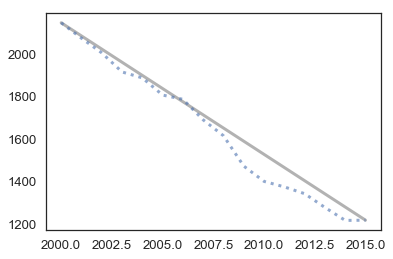

In [61]:
results = run_simulation1(system)
plot(results, color='gray', label='model')
plot(year, totalpc, ':', label='Tobacco')
#plot_results(relevant_data, results, 'Constant growth model')

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [10]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [11]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

Here's what these estimates look like.

Saving figure to file figs/chap03-fig01.pdf


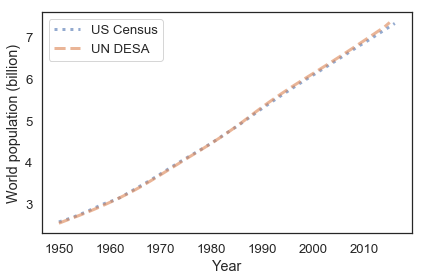

In [12]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')
savefig('figs/chap03-fig01.pdf')

The following expression computes the elementwise differences between the two series, then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [13]:
max(abs(census - un) / un) * 100

1.3821293828998855

In [14]:
# Solution goes here
census - un

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
1955    0.020448
1956    0.023728
1957    0.028307
1958    0.032107
1959    0.030321
1960    0.016999
1961    0.001137
1962   -0.000978
1963    0.008650
1964    0.017462
1965    0.021303
1966    0.023203
1967    0.021812
1968    0.020639
1969    0.021050
1970    0.021525
1971    0.023573
1972    0.023695
1973    0.022914
1974    0.021304
1975    0.018063
1976    0.014049
1977    0.011268
1978    0.008441
1979    0.007486
          ...   
1987   -0.018115
1988   -0.023658
1989   -0.028560
1990   -0.031861
1991   -0.037323
1992   -0.038763
1993   -0.040597
1994   -0.042404
1995   -0.042619
1996   -0.041576
1997   -0.040716
1998   -0.040090
1999   -0.039403
2000   -0.039129
2001   -0.038928
2002   -0.038837
2003   -0.039401
2004   -0.040006
2005   -0.041050
2006   -0.041964
2007   -0.043192
2008   -0.044599
2009   -0.046508
2010   -0.057599
2011   -0.061999
2012   -0.066201
2013   -0.069991
2014   -0

In [18]:
census[1950]

2.557628654

And the last value.

In [19]:
census[2016]

7.325996709

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [20]:
t_0 = get_first_label(census)

1950

In [21]:
t_end = get_last_label(census)

2016

In [22]:
elapsed_time = t_end - t_0

66

And we can get the first and last values:

In [23]:
p_0 = get_first_value(census)

2.557628654

In [24]:
p_end = get_last_value(census)

7.325996709

Then we can compute the average annual growth in billions of people per year.

In [25]:
total_growth = p_end - p_0

4.768368055

In [26]:
annual_growth = total_growth / elapsed_time

0.07224800083333333

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [27]:
results = TimeSeries()

,values


Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [28]:
results[t_0] = census[t_0]
results

,values
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [30]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

Here's what the results looks like, compared to the actual data.

Saving figure to file figs/chap03-fig02.pdf


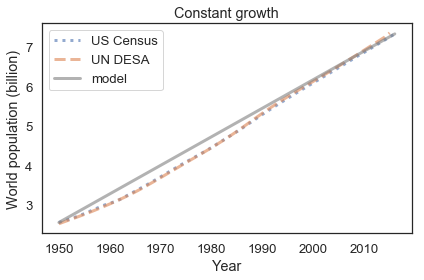

In [31]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
savefig('figs/chap03-fig02.pdf')

In [3]:
#TO - DO LIST:
#ANALYZE DATA IN CONSUMPTION TRENDS OF NON E-CIGARETTE 
#DEVELOP STATE OBJECTS cigarette_use = State(tobacco = x, ecigarette = y)
#DEVELOP SYSTEM OBJECTS 
#PLOT DATA
#DEVELOP MODEL
#PREDICT TOBACCO USE 20 YEARS FROM NOW


